In [1]:
import pandas as pd
import numpy as np

In [456]:
import json
import requests
d = json.loads(requests.get('https://data.gov.in/node/337121/datastore/export/json').text)

edu14 = pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])


In [17]:
d = json.loads(requests.get('https://data.gov.in/node/126140/datastore/export/json').text)

edu13 = pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])


In [8]:
d = json.loads(requests.get('https://data.gov.in/node/337101/datastore/export/json').text)

prof14= pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])

In [18]:
d = json.loads(requests.get('https://data.gov.in/node/126136/datastore/export/json').text)
d = json.loads(requests.get('https://data.gov.in/node/337101/datastore/export/json').text)

prof14= pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])
prof13= pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])

In [19]:
d = json.loads(requests.get('https://data.gov.in/node/337141/datastore/export/json').text)

soc14 = pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])

In [20]:
d = json.loads(requests.get('https://data.gov.in/node/126138/datastore/export/json').text)

soc13 = pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]])

In [21]:
edu14.head()

,States/UTs,Year,CrimeHead,Male,Female,Transgender,Total
0,Andhra Pradesh,2014,No Education,927,470,0,1397
1,Andhra Pradesh,2014,Primary (upto class-5),743,385,0,1128
2,Andhra Pradesh,2014,Middle (upto class-8),630,343,0,973
3,Andhra Pradesh,2014,Matriculate/Secondary (upto class-10),657,306,0,963
4,Andhra Pradesh,2014,Higher Secondary/ Intermediate/ Pre-University...,395,150,0,545


In [458]:
edu14['Total']=pd.to_numeric(edu14['Total'] , errors='ignore')
edu14['Male']=pd.to_numeric(edu14['Male'] , errors='ignore')
edu14['Female']=pd.to_numeric(edu14['Female'] , errors='ignore')
edu14['Transgender']=pd.to_numeric(edu14['Transgender'] , errors='ignore')
edu14.dtypes

States/UTs     object
Year           object
CrimeHead      object
Male            int64
Female          int64
Transgender     int64
Total           int64
dtype: object

In [109]:
pie14=edu14[edu14['CrimeHead']=='Total'].sort_values('Total',ascending=False).head(11).drop(index=369)


pie14=pd.DataFrame(pie14[['Total','States/UTs']])

pie14=pie14.set_index(pie14['States/UTs'])

In [165]:
pie14

,Total,States/UTs
States/UTs,,
Maharashtra,16307,Maharashtra
Tamil Nadu,16122,Tamil Nadu
West Bengal,14310,West Bengal
Karnataka,10945,Karnataka
Telangana,9623,Telangana
Madhya Pradesh,9039,Madhya Pradesh
Kerala,8446,Kerala
Gujarat,7225,Gujarat
Andhra Pradesh,6101,Andhra Pradesh


In [58]:
edu13['Total']=pd.to_numeric(edu13['Total'] , errors='ignore')
edu13['Male']=pd.to_numeric(edu13['Male'] , errors='ignore')
edu13['Female']=pd.to_numeric(edu13['Female'] , errors='ignore')

edu13.dtypes

State/UTs    object
Year         object
CAUSE        object
Male          int64
Female        int64
Total         int64
dtype: object

In [158]:
pie13=edu13[edu13['CAUSE']=='Total'].sort_values('Total',ascending=False).head(12).drop(index=[8,17])

pie13=pd.DataFrame(pie13[['Total','State/UTs']])

pie13=pie13.set_index(pie13['State/UTs'])

In [166]:
pie13

,Total,State/UTs
State/UTs,,
Maharashtra,16622,Maharashtra
Tamil Nadu,16601,Tamil Nadu
Andhra Pradesh,14607,Andhra Pradesh
West Bengal,13055,West Bengal
Karnataka,11266,Karnataka
Madhya Pradesh,9446,Madhya Pradesh
Kerala,8646,Kerala
Gujarat,7166,Gujarat
Chhattisgarh,5436,Chhattisgarh


In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import table


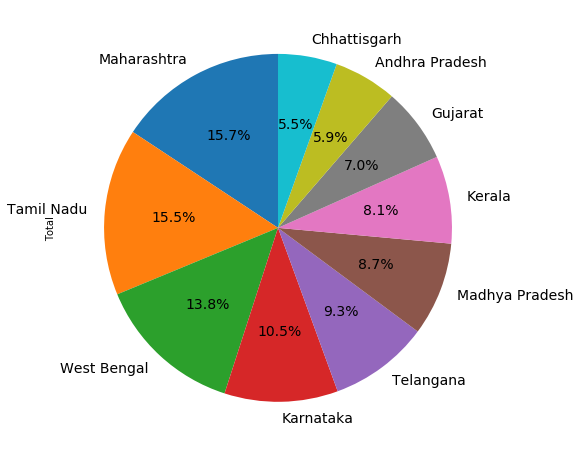

In [150]:
plt.figure(figsize=(20,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie14.plot(kind='pie', y = 'Total', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=pie14['States/UTs'], legend = False, fontsize=14)


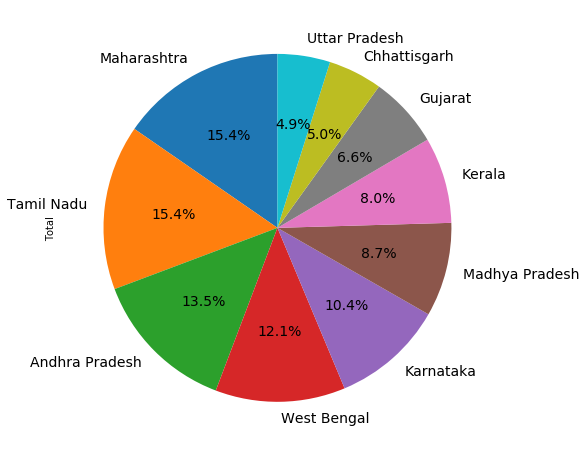

In [164]:
plt.figure(figsize=(20,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
pie13.plot(kind='pie', y = 'Total', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=pie13['State/UTs'], legend = False, fontsize=14)


In [262]:
pie14=edu14[edu14['CrimeHead']=='Total'].sort_values('Total',ascending=False).head(11).drop(index=369)

#pie14=pie14.drop(['Year','CrimeHead','Total'],axis=1)
pie14

,States/UTs,Year,CrimeHead,Male,Female,Transgender,Total
149,Maharashtra,2014,Total,11828,4476,3,16307
239,Tamil Nadu,2014,Total,10963,5155,4,16122
289,West Bengal,2014,Total,8886,5424,0,14310
119,Karnataka,2014,Total,7684,3259,2,10945
249,Telangana,2014,Total,6669,2954,0,9623
139,Madhya Pradesh,2014,Total,5341,3698,0,9039
129,Kerala,2014,Total,6412,2034,0,8446
69,Gujarat,2014,Total,4603,2622,0,7225
9,Andhra Pradesh,2014,Total,4220,1880,1,6101
49,Chhattisgarh,2014,Total,3763,1920,0,5683


In [264]:
a=pie14['States/UTs'].values

array(['Maharashtra', 'Tamil Nadu', 'West Bengal', 'Karnataka',
       'Telangana', 'Madhya Pradesh', 'Kerala', 'Gujarat',
       'Andhra Pradesh', 'Chhattisgarh'], dtype=object)

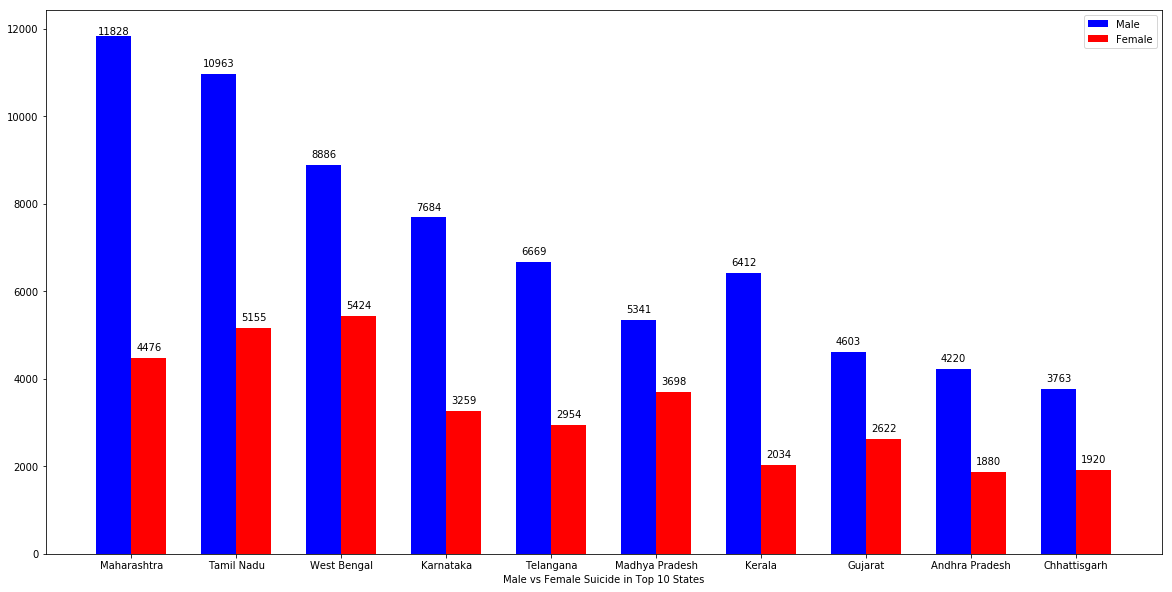

In [388]:
indices = range(len(pie14['States/UTs']))
names=['Maharashtra', 'Tamil Nadu', 'West Bengal', 'Karnataka',
       'Telangana', 'Madhya Pradesh', 'Kerala', 'Gujarat',
       'Andhra Pradesh', 'Chhattisgarh']
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a= ax.bar(indices-width/2.,pie14['Male'],width,color='b',)
b= ax.bar(indices+width/2.,pie14['Female'],width,color='r')
#tiks = ax.get_xticks().tolist()

def autolabel(rects):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.001)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
        

autolabel(a)

autolabel(b)
        
ax.axes.set_xticks(np.arange(10))
ax.axes.set_xticklabels(names)
ax.set_xlabel('Male vs Female Suicide in Top 10 States')
ax.legend(('Male','Female'))
plt.show()

In [459]:
edu14.groupby('CrimeHead').sum()

,Male,Female,Transgender,Total
CrimeHead,,,,
Diploma/ITI/Certificate,3372,1155,0,4527
Graduate and above,8010,3201,0,11211
Higher Secondary/ Intermediate/ Pre-University (upto class-12),30237,13044,3,43284
Matriculate/Secondary (upto class-10),57228,23775,3,81006
Middle (upto class-8),53493,26199,6,79698
No Education,35313,21012,9,56334
Primary (upto class-5),49479,25581,0,75060
Professionals (MBA; etc.),867,282,0,1149
Status not known,29388,13314,27,42729


[Text(0, 0, 'No Education'),
 Text(0, 0, 'Primary (upto class-5)'),
 Text(0, 0, 'Middle (upto class-8)'),
 Text(0, 0, 'Matriculate/Secondary (upto class-10)'),
 Text(0, 0, 'Higher Secondary/ Intermediate/ Pre-University (upto class-12)'),
 Text(0, 0, 'Diploma/ITI/Certificate'),
 Text(0, 0, 'Graduate and above'),
 Text(0, 0, 'Professionals (MBA; etc.)')]

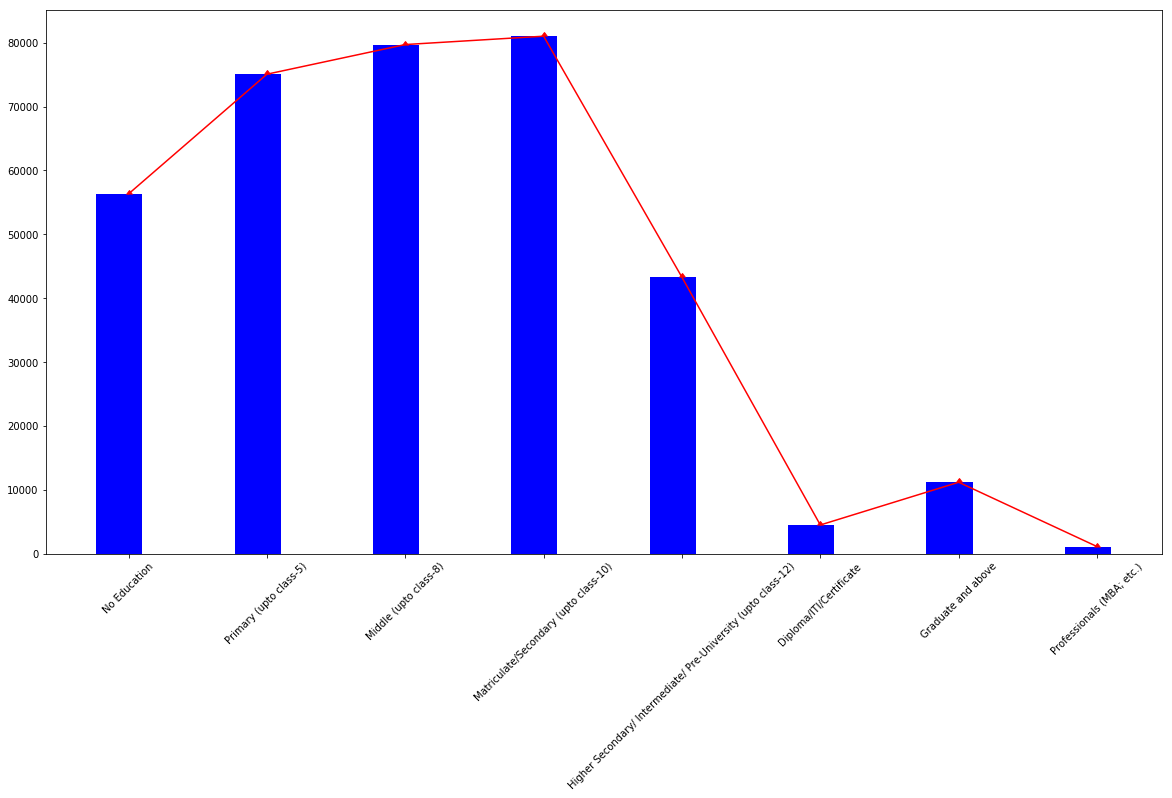

In [473]:
new=edu14.groupby('CrimeHead').sum()
new=new.drop(index=['Status not known','Total'])

re=['No Education','Primary (upto class-5)','Middle (upto class-8)','Matriculate/Secondary (upto class-10)',
    'Higher Secondary/ Intermediate/ Pre-University (upto class-12)','Diploma/ITI/Certificate','Graduate and above','Professionals (MBA; etc.)']
new=new.reindex(re)

indices = range(len(new['Total']))
width = np.min(np.diff(indices))/3.

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(new['Total'],marker=10,color="r")
ax.bar(indices-width/5,new['Total'],width,color='b',)
ax.axes.set_xticks(np.arange(8))
ax.axes.set_xticklabels(re,rotation=45)

In [328]:
prof=prof[['States/UTs','CrimeHead','Male_below 14 years','Male_60 years & above','Male_Total','Female_below 14 years','Female_60 years & above','Female_Total', 'Grand Total']]

In [335]:
prof['Male_below 14 years']=pd.to_numeric(prof['Male_below 14 years'] , errors='ignore')

prof['Male_60 years & above']=pd.to_numeric(prof['Male_60 years & above'] , errors='ignore')

prof['Male_Total']=pd.to_numeric(prof['Male_Total'] , errors='ignore')

prof['Female_below 14 years']=pd.to_numeric(prof['Female_below 14 years'] , errors='ignore')

prof['Female_60 years & above']=pd.to_numeric(prof['Female_60 years & above'] , errors='ignore')

prof['Female_Total']=pd.to_numeric(prof['Female_Total'] , errors='ignore')

prof['Grand Total']=pd.to_numeric(prof['Grand Total'] , errors='ignore')
                                  
prof.dtypes

States/UTs                 object
CrimeHead                  object
Male_below 14 years         int64
Male_60 years & above       int64
Male_Total                  int64
Female_below 14 years       int64
Female_60 years & above     int64
Female_Total                int64
Grand Total                 int64
dtype: object

In [370]:
top7=prof.groupby('CrimeHead').sum().sort_values('Grand Total',ascending=False).drop(index=['Total','Others','Self-employed Persons (Total)','Agricultural Labourers',]).head(7)

top7['14_60 combine']=top7['Male_below 14 years']+top7['Female_below 14 years']+top7['Male_60 years & above']+top7['Female_60 years & above']

top7

,Male_below 14 years,Male_60 years & above,Male_Total,Female_below 14 years,Female_60 years & above,Female_Total,Grand Total,14_60 combine
CrimeHead,,,,,,,,
Housewife,0,0,0,51,3663,60444,60444,3714
Daily Wage Earner,21,3090,41832,12,402,5373,47205,3525
Agriculture (Total),6,3168,32667,12,498,4413,37080,3684
Unemployed Persons,33,2397,25458,24,447,4284,29754,2901
Business (Total),18,1374,27084,12,183,2598,29682,1587
Profession/Salaried Persons (Total),18,627,24807,12,69,4614,29421,726
Students,1149,6,12783,1137,24,11421,24204,2316


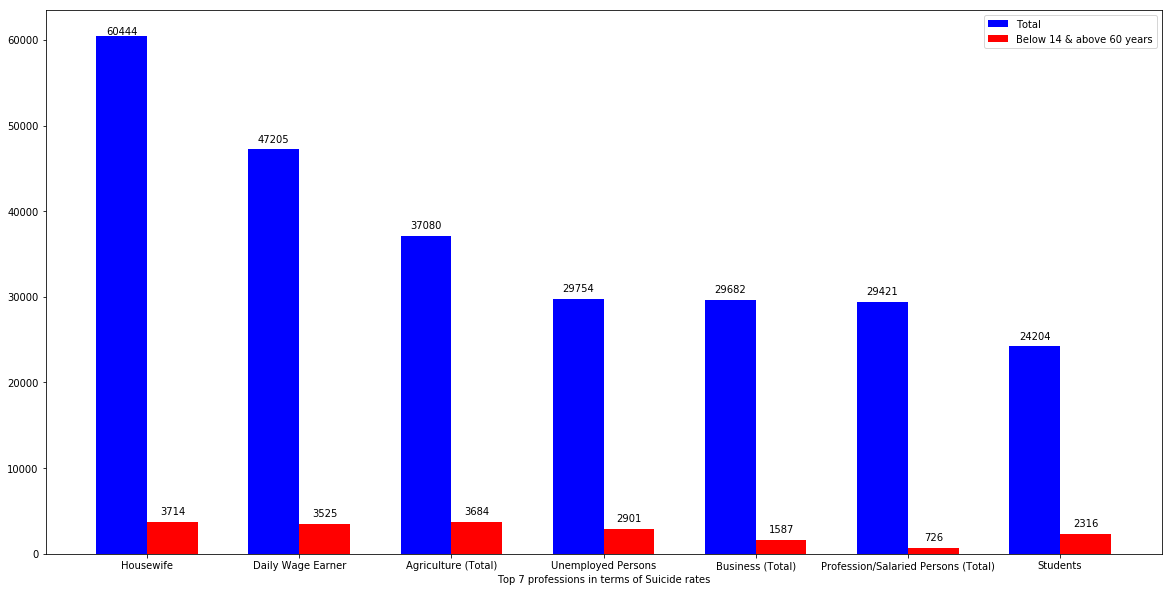

In [387]:
indices = range(len(top7))

# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a=ax.bar(indices-width/2.,top7['Grand Total'],width,color='b',)
b=ax.bar(indices+width/2.,top7['14_60 combine'],width,color='r')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticks(np.arange(7))
ax.axes.set_xticklabels(top7.index)

def autolabel(rects):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.001)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(a)

autolabel(b)

ax.set_xlabel('Top 7 professions in terms of Suicide rates')
ax.legend(('Total','Below 14 & above 60 years'))
plt.show()

In [417]:
soc14['Male']=pd.to_numeric(soc14['Male'] , errors='ignore')

soc14['Female']=pd.to_numeric(soc14['Female'] , errors='ignore')

soc14['Transgender']=pd.to_numeric(soc14['Transgender'] , errors='ignore')

soc14['Total']=pd.to_numeric(soc14['Total'] , errors='ignore')

lm=soc14.groupby('CrimeHead').sum().sort_values('Total',ascending=False).drop(['Total','Status not known'])

lm



,Male,Female,Transgender,Total
CrimeHead,,,,
Married,179232,81192,0,260424
Un-Married,53997,29460,18,83475
Others,15477,7017,18,22512
Widowed/Widower,4230,3912,0,8142
Divorcee,1653,1251,0,2904
Separated,1797,948,3,2748


[Text(0, 0, 'Married'),
 Text(0, 0, 'Un-Married'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Widowed/Widower'),
 Text(0, 0, 'Divorcee'),
 Text(0, 0, 'Separated')]

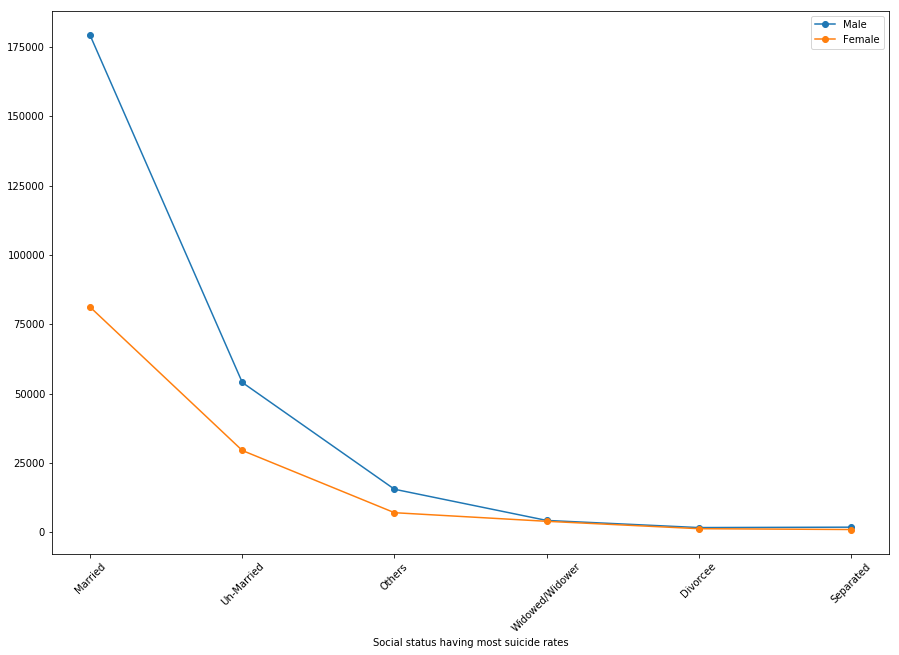

In [421]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.plot(lm['Male'],marker="o")

ax.plot(lm['Female'],marker="o")

ax.legend(('Male','Female'))

ax.set_xlabel('Social status having most suicide rates')

ax.axes.set_xticks(np.arange(6))

ax.axes.set_xticklabels(lm.index,rotation=45)